In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from operator import attrgetter
from datetime import timedelta
from IPython.display import Image

In [97]:
df_customers = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-na-t/Project/olist_customers_dataset.csv')
df_orders = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-na-t/Project/olist_orders_dataset.csv', parse_dates=['order_purchase_timestamp', 
                                                             'order_approved_at',
                                                             'order_delivered_carrier_date',
                                                             'order_delivered_customer_date',
                                                             'order_estimated_delivery_date'])

df_products = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-na-t/Project/olist_order_items_dataset.csv')


In [98]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [99]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [100]:
df_products.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [101]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [102]:
df1 =df_orders.merge(df_products, on='order_id')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   customer_id                    112650 non-null  object        
 2   order_status                   112650 non-null  object        
 3   order_purchase_timestamp       112650 non-null  datetime64[ns]
 4   order_approved_at              112635 non-null  datetime64[ns]
 5   order_delivered_carrier_date   111456 non-null  datetime64[ns]
 6   order_delivered_customer_date  110196 non-null  datetime64[ns]
 7   order_estimated_delivery_date  112650 non-null  datetime64[ns]
 8   order_item_id                  112650 non-null  int64         
 9   product_id                     112650 non-null  object        
 10  seller_id                      112650 non-null  object        
 11  

In [103]:
# Посмотрим информацию о датафрейме
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [104]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [105]:
# Проверю данные на наличие пустых и повторяющихся строк.

In [106]:
df_customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [107]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [108]:
print(df_orders.duplicated().sum())
print(df_customers.duplicated().sum())

0
0


In [109]:
# Посмотрим немного описательной статистки по числовым колонкам 
df_customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [110]:
df_orders.describe()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence thi

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e4be5aacc6848e44f045dfeb0e005447,a9ad56640447278808ed364f472d7401,delivered,2018-03-31 15:08:21,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


**1. Сколько у нас пользователей, которые совершили покупку только один раз?**

Для того, чтобы проверить, что является покупкой, исследуем статусы заказов.  
Большинство заказов имеет статус delivered 

In [111]:
df_orders.groupby('order_status').agg({'order_status':'count'})

,order_status
order_status,
approved,2
canceled,625
created,5
delivered,96478
invoiced,314
processing,301
shipped,1107
unavailable,609


Большинство заказов оплачивается до момента доставки

In [112]:
df_orders.query('order_approved_at.notna()').groupby('order_status').agg({'order_status':'count'})/ df_orders.groupby('order_status').agg({'order_status':'count'})

,order_status
order_status,
approved,1.000000
canceled,0.774400
created,NaN
delivered,0.999855
invoiced,1.000000
processing,1.000000
shipped,1.000000
unavailable,1.000000


Изучим отмененные заказы, всего 6 из отмененных заказов были доставлены. То есть большинство доставленных заказов в дальнейшем не отменяют.

In [113]:
df_orders.query('order_status=="canceled" & order_delivered_customer_date.notna()')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
2921,1950d777989f6a877539f53795b4c3c3,1bccb206de9f0f25adc6871a1bcf77b2,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51,2018-03-09
8791,dabf2b0e35b423f94618bf965fcb7514,5cdec0bb8cbdf53ffc8fdc212cd247c6,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30
58266,770d331c84e5b214bd9dc70a10b829d0,6c57e6119369185e575b36712766b0ef,canceled,2016-10-07 14:52:30,2016-10-07 15:07:10,2016-10-11 15:07:11,2016-10-14 15:07:11,2016-11-29
59332,8beb59392e21af5eb9547ae1a9938d06,bf609b5741f71697f65ce3852c5d2623,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30
92636,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25
94399,2c45c33d2f9cb8ff8b1c86cc28c11c30,de4caa97afa80c8eeac2ff4c8da5b72e,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08


 На основе изучения данных я буду считать покупкой заказ со статусом delivered, который оплачен и доставлен.  
 Оплаченным заказом буду считать заказ, по которому имеется информация в столбце order_approved_at.  
 Доставленным заказом буду считать заказ, по которому имеется информация в столбце order_delivered_customer_date.  

In [114]:
df_orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [115]:
df_purchases = df_orders.query('order_status=="delivered" & order_approved_at.notna() & order_delivered_customer_date.notna()')
df_purchases.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


**1. Подсчитать количество пользователей, которые совершили покупку только один раз.**

Для выполнения задания объединю таблицу с покупками df_purchases и таблицу с данными о покупателях df_customers

In [116]:
df_cust_and_purch = df_customers.merge(df_purchases, how='inner', on='customer_id')
df_cust_and_purch.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


90537 пользователей совершили покупку только один раз

In [117]:
df_cust_and_purch.groupby('customer_unique_id', as_index=False).agg({'order_id':'count'}).query('order_id==1') \
.rename(columns={'order_id': 'order_id_count'})

,customer_unique_id,order_id_count
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
93332,fffcf5a5ff07b0908bd4e2dbc735a684,1
93333,fffea47cd6d3cc0a88bd621562a9d061,1
93334,ffff371b4d645b6ecea244b27531430a,1
93335,ffff5962728ec6157033ef9805bacc48,1


**2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)**

Считаю, что корректно будет выделить заказы со статусами 'canceled' и 'unavailable', так как в других статусах нет основания полагать, что они не доставлены или не доставятся.

In [118]:
# Создадим новый датафрейм, у которого на месте индекса будут даты создания заказа

orders_with_timeindex = df_orders.set_index('order_purchase_timestamp')
orders_with_timeindex.head()

,order_id,customer_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_purchase_timestamp,,,,,,,
2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
2018-07-24 20:41:37,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2018-08-08 08:38:49,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
2017-11-18 19:28:06,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
2018-02-13 21:18:39,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


 Подсчитаем количество заказов со статусом canceled по месяцам

In [119]:
canceled_orders = orders_with_timeindex.query('order_status =="canceled"') \
                                          .resample("M").order_id.count().reset_index() \
                                          .rename(columns={'order_id': 'canceled_orders_number'})
canceled_orders.head()

,order_purchase_timestamp,canceled_orders_number
0,2016-09-30,2
1,2016-10-31,24
2,2016-11-30,0
3,2016-12-31,0
4,2017-01-31,3


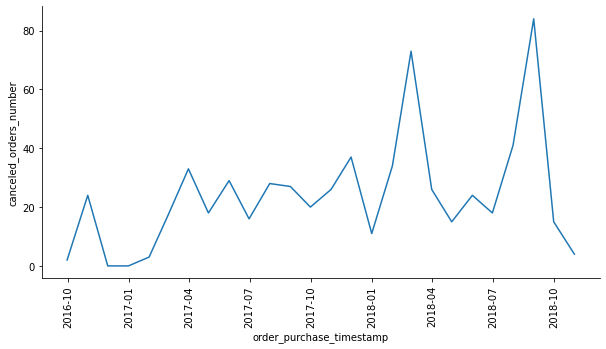

In [120]:
# Визуализируем результаты на графике lineplot

plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.lineplot(x='order_purchase_timestamp', y='canceled_orders_number', data=canceled_orders)
sns.despine()


In [121]:
# Посчитаем среднее

In [122]:
canceled_orders.canceled_orders_number.mean().round(2)

24.04

In [123]:
# Подсчитаем количество заказов со статусом unavailable по месяцам

In [124]:
unavailable_orders = orders_with_timeindex.query('order_status =="unavailable"') \
                                          .resample("M").order_id.count().reset_index() \
                                          .rename(columns={'order_id': 'unavailable_orders_number'})
unavailable_orders.head()

,order_purchase_timestamp,unavailable_orders_number
0,2016-10-31,7
1,2016-11-30,0
2,2016-12-31,0
3,2017-01-31,10
4,2017-02-28,45


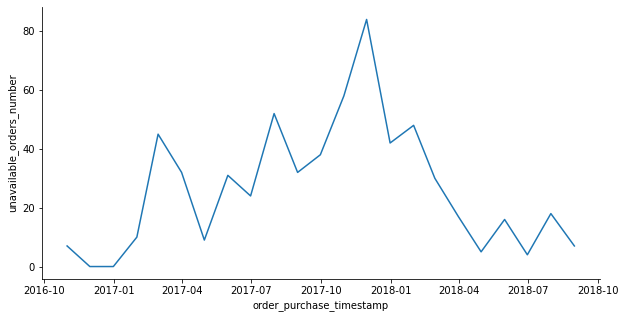

In [125]:
# Визуализируем результаты на графике lineplot

plt.figure(figsize=(10,5))
sns.lineplot(x='order_purchase_timestamp', y='unavailable_orders_number', data=unavailable_orders)
sns.despine()


In [126]:
unavailable_orders.unavailable_orders_number.mean().round(2)

26.48

**3. По каждому товару определить, в какой день недели товар чаще всего покупается. (5 баллов)**

В качестве времени покупки может быть использовано время оплаты заказа и время создания заказа. 
В данном случае, будем считать временем покупки время создания заказа, а не время оплаты/доставки, поскольку на время создания влияет только решение пользователя, при этом на время оплаты/доставки влияет множество факторов.

In [127]:
# Соединим таблицу df_products с таблицей df_purchases для того, чтобы отобрать только реальные покупки
# Также добавим колонку с названием недели, когда была произведена покупка

products_with_dates = df_products[['order_id', 'product_id']].merge(df_purchases[['order_id', 'order_purchase_timestamp']], 
                                                                    on='order_id')
products_with_dates['day_of_week'] = products_with_dates.order_purchase_timestamp.dt.day_name()
products_with_dates.head()

,order_id,product_id,order_purchase_timestamp,day_of_week
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,2017-09-13 08:59:02,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,2017-04-26 10:53:06,Wednesday
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,2018-01-14 14:33:31,Sunday
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,2018-08-08 10:00:35,Wednesday
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,2017-02-04 13:57:51,Saturday


In [128]:
# Для того, чтобы найти в какой день недели товар чаще всего покупается, необходимо найти день, который встречается чаще всего,
# т.е., моду данного значения

products_with_dates.groupby(['product_id']).agg({'day_of_week':pd.Series.mode})

,day_of_week
product_id,
00066f42aeeb9f3007548bb9d3f33c38,Sunday
00088930e925c41fd95ebfe695fd2655,Tuesday
0009406fd7479715e4bef61dd91f2462,Thursday
000b8f95fcb9e0096488278317764d19,"[Friday, Wednesday]"
000d9be29b5207b54e86aa1b1ac54872,Tuesday
...,...
fff6177642830a9a94a0f2cba5e476d1,"[Saturday, Sunday]"
fff81cc3158d2725c0655ab9ba0f712c,Monday
fff9553ac224cec9d15d49f5a263411f,Friday


**4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?**  
Не стоит забывать, что внутри месяца может быть не целое количество недель.   
Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. 

Будем считать количество пользователей по месяцам и по годам, поскольку на мой взгляд более информативным   
будет показатель, посчитанный по конкретному временному периоду.

In [129]:
# Для удобства создадим новый датафрейм, который является соединением таблиц df_customers с таблицей df_purchases.
# Также добавим столбцы с месяцем и количеством недель в месяце.

df_users = df_customers[['customer_id', 'customer_unique_id']].merge(df_purchases[['customer_id','order_id','order_purchase_timestamp']], 
                                                                     on='customer_id')
#df_users['year'] = df_users['order_purchase_timestamp'].dt.year
df_users['month'] = df_users['order_purchase_timestamp'].dt.to_period('M')
df_users['week_number'] = round(df_users['order_purchase_timestamp'].dt.days_in_month/7, 2)
df_users.head()

,customer_id,customer_unique_id,order_id,order_purchase_timestamp,month,week_number
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05,4.43
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,2018-01,4.43
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,2018-05,4.43
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,2018-03,4.43
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,2018-07,4.43


In [130]:
# Найдем количество покупок для каждого пользователя по годам и месяцам

weekly_orders_in_month_by_users = df_users.groupby(['customer_unique_id', 'month'])\
.agg({'week_number':'mean','order_id':'count'})\
.sort_values(['customer_unique_id','month'], ascending=[False,False])
weekly_orders_in_month_by_users.head()

,,week_number,order_id
customer_unique_id,month,,
ffffd2657e2aad2907e67c3e9daecbeb,2017-05,4.43,1
ffff5962728ec6157033ef9805bacc48,2018-05,4.43,1
ffff371b4d645b6ecea244b27531430a,2017-02,4.00,1
fffea47cd6d3cc0a88bd621562a9d061,2017-12,4.43,1
fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,4.29,1


In [131]:
# Рассчитаем для каждого пользователя среднее количество покупок в неделю

weekly_orders_in_month_by_users['avg_orders_per_week'] = round(weekly_orders_in_month_by_users['order_id'] / 
                                                               weekly_orders_in_month_by_users['week_number'],2)

weekly_orders_in_month_by_users.head()

,,week_number,order_id,avg_orders_per_week
customer_unique_id,month,,,
ffffd2657e2aad2907e67c3e9daecbeb,2017-05,4.43,1,0.23
ffff5962728ec6157033ef9805bacc48,2018-05,4.43,1,0.23
ffff371b4d645b6ecea244b27531430a,2017-02,4.00,1,0.25
fffea47cd6d3cc0a88bd621562a9d061,2017-12,4.43,1,0.23
fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,4.29,1,0.23


**5. Используя pandas, проведи когортный анализ пользователей.   
В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.**

In [132]:
# Возьмем датафрейм из предыдущего задания и уберем лишние колонки

df_cohort = df_users[['customer_unique_id','order_id','order_purchase_timestamp']]
df_cohort.head()

,customer_unique_id,order_id,order_purchase_timestamp
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30


Для того, чтобы провести когортный анализ, нужно:
1. Выявить когорту пользователей. В нашем случае мы будем делить наших пользователей по месяцу покупки.
2. Интервал времени, в течение которого считается метрика. Это будет месяц.
3. Метрика, которая считается. Мы будем считать retention, т.е. количество пользователей, которые вернулись к нашему продукту через N-ое количество дней (в нашем случае, через месяц) после первой покупки.

In [133]:
# Создадим 2 колонки: год-месяц покупки конкретного заказа и самая первая покупка для конкретного пользователя

df_cohort['order_month'] = df_cohort['order_purchase_timestamp'].dt.to_period('M')
df_cohort['cohort'] = df_cohort.groupby('customer_unique_id')['order_month'].transform('min')
df_cohort.head()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,customer_unique_id,order_id,order_purchase_timestamp,order_month,cohort
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,2018-01,2018-01
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,2018-05,2018-05
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,2018-03,2018-03
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,2018-07,2018-07


In [134]:
# Сгруппируем данные по когорте и год-месяцу покупки заказа и посчитаем количество уникальных пользователей

df_cohort = df_cohort.groupby(['cohort', 'order_month']) \
                        .agg({'customer_unique_id': pd.Series.nunique}) \
                        .rename(columns={'customer_unique_id': 'num_customers'}) \
                        .reset_index()

In [135]:
# Посчитаем сколько прошло месяцев между первой покупкой и датой покупки заказа

df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))
df_cohort.head()

,cohort,order_month,num_customers,period_number
0,2016-09,2016-09,1,0
1,2016-10,2016-10,262,0
2,2016-10,2017-04,1,6
3,2016-10,2017-07,1,9
4,2016-10,2017-09,1,11


In [136]:
# Трансформируем нашу таблицу так, чтобы в индексах были наши когорты, в столбцах — период после первой покупки,
# в значениях — количество уникальных пользователей, пришедших на данный период после первой покупки

df_cohort_pivot = pd.pivot_table(df_cohort, values='num_customers', index='cohort',
                    columns='period_number', aggfunc=np.sum)
df_cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,262.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,2.0
2016-12,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,715.0,2.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,3.0,1.0,5.0,3.0,1.0,1.0,2.0,3.0,1.0,NaN
2017-02,1616.0,3.0,5.0,2.0,7.0,2.0,4.0,3.0,1.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,3.0,NaN,NaN
2017-03,2503.0,11.0,9.0,10.0,9.0,4.0,4.0,8.0,8.0,2.0,9.0,3.0,5.0,3.0,4.0,6.0,2.0,3.0,NaN,NaN
2017-04,2256.0,14.0,5.0,4.0,6.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,NaN,NaN
2017-05,3450.0,16.0,16.0,10.0,10.0,11.0,14.0,5.0,9.0,9.0,9.0,12.0,8.0,1.0,6.0,7.0,NaN,NaN,NaN,NaN
2017-06,3037.0,15.0,12.0,13.0,9.0,12.0,11.0,7.0,4.0,6.0,9.0,11.0,5.0,5.0,7.0,NaN,NaN,NaN,NaN,NaN


In [137]:
# Для того, чтобы посчитать retention, нам нужно поделить каждую ячейку на его первое значение в строке, 
# к которой он принадлежит. 
# Возьмем в отдельную переменную первые значения строк

cohort_size = df_cohort_pivot.iloc[:,0]
cohort_size

cohort
2016-09       1.0
2016-10     262.0
2016-12       1.0
2017-01     715.0
2017-02    1616.0
2017-03    2503.0
2017-04    2256.0
2017-05    3450.0
2017-06    3037.0
2017-07    3752.0
2017-08    4057.0
2017-09    4004.0
2017-10    4329.0
2017-11    7059.0
2017-12    5338.0
2018-01    6842.0
2018-02    6288.0
2018-03    6774.0
2018-04    6582.0
2018-05    6506.0
2018-06    5875.0
2018-07    5946.0
2018-08    6144.0
Freq: M, Name: 0, dtype: float64

In [138]:
# Поделим значения ячейки на соответствующие им значения размера когорты и получим таблицу retention
# Заполним ненужные значения NaN прочерком

retention_matrix = df_cohort_pivot.divide(cohort_size, axis = 0).mul(100).round(2)
retention_matrix.fillna('-')

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort,,,,,,,,,,,,,,,,,,,,
2016-09,100.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2016-10,100.0,-,-,-,-,-,0.38,-,-,0.38,-,0.38,-,0.38,-,0.38,-,0.38,0.76,0.76
2016-12,100.0,100,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2017-01,100.0,0.28,0.28,0.14,0.42,0.14,0.42,0.14,0.14,-,0.42,0.14,0.7,0.42,0.14,0.14,0.28,0.42,0.14,-
2017-02,100.0,0.19,0.31,0.12,0.43,0.12,0.25,0.19,0.06,0.19,0.12,0.31,0.12,0.19,0.12,0.06,0.06,0.19,-,-
2017-03,100.0,0.44,0.36,0.4,0.36,0.16,0.16,0.32,0.32,0.08,0.36,0.12,0.2,0.12,0.16,0.24,0.08,0.12,-,-
2017-04,100.0,0.62,0.22,0.18,0.27,0.27,0.35,0.31,0.31,0.18,0.27,0.09,0.04,0.04,0.09,0.09,0.13,-,-,-
2017-05,100.0,0.46,0.46,0.29,0.29,0.32,0.41,0.14,0.26,0.26,0.26,0.35,0.23,0.03,0.17,0.2,-,-,-,-
2017-06,100.0,0.49,0.4,0.43,0.3,0.4,0.36,0.23,0.13,0.2,0.3,0.36,0.16,0.16,0.23,-,-,-,-,-


In [139]:
# Укажем максимальное значение в каждом столбце

retention_matrix.style.highlight_max()

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort,,,,,,,,,,,,,,,,,,,,
2016-09,100.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2016-10,100.000000,nan,nan,nan,nan,nan,0.380000,nan,nan,0.380000,nan,0.380000,nan,0.380000,nan,0.380000,nan,0.380000,0.760000,0.760000
2016-12,100.000000,100.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2017-01,100.000000,0.280000,0.280000,0.140000,0.420000,0.140000,0.420000,0.140000,0.140000,nan,0.420000,0.140000,0.700000,0.420000,0.140000,0.140000,0.280000,0.420000,0.140000,nan
2017-02,100.000000,0.190000,0.310000,0.120000,0.430000,0.120000,0.250000,0.190000,0.060000,0.190000,0.120000,0.310000,0.120000,0.190000,0.120000,0.060000,0.060000,0.190000,nan,nan
2017-03,100.000000,0.440000,0.360000,0.400000,0.360000,0.160000,0.160000,0.320000,0.320000,0.080000,0.360000,0.120000,0.200000,0.120000,0.160000,0.240000,0.080000,0.120000,nan,nan
2017-04,100.000000,0.620000,0.220000,0.180000,0.270000,0.270000,0.350000,0.310000,0.310000,0.180000,0.270000,0.090000,0.040000,0.040000,0.090000,0.090000,0.130000,nan,nan,nan
2017-05,100.000000,0.460000,0.460000,0.290000,0.290000,0.320000,0.410000,0.140000,0.260000,0.260000,0.260000,0.350000,0.230000,0.030000,0.170000,0.200000,nan,nan,nan,nan
2017-06,100.000000,0.490000,0.400000,0.430000,0.300000,0.400000,0.360000,0.230000,0.130000,0.200000,0.300000,0.360000,0.160000,0.160000,0.230000,nan,nan,nan,nan,nan


**Ответ: В период с января по декабрь когорта с самым высоким retention на 3й месяц - это когорта 2017-06.**

**6. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.**  
В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты,   
F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время.   
Подробно опиши, как ты создавал кластеры.  
Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров.  
Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней,   
frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. 

Методология  
Чтобы получить оценку RFM клиента, нам нужно сначала рассчитать оценки R, F и M по шкале от 1 (худший) до 5 (лучший).
1. рассчитать Recency = количество дней с момента последней покупки  
2. рассчитать Freqency = количество покупок за исследуемый период (обычно один год)  
3. рассчитать Monetary = общая сумма покупок, сделанных за исследуемый период  
4. найти квинтили для каждого из этих измерений  
5. дайте оценку каждому параметру в зависимости от того, в каком квинтиле он находится  
6. объединить баллы R, F и M, чтобы получить балл RFM  
7. сопоставить оценки RF с сегментами  

Объединим необходымые для выполнения задания колонки датафреймов

In [140]:
sales=df_purchases[['order_id', 'order_purchase_timestamp', 'customer_id']]\
.merge(df_customers[['customer_unique_id', 'customer_id']], on='customer_id')\
.merge(df_products[['product_id', 'order_id','order_item_id', 'price']], on='order_id')
          
sales

,order_id,order_purchase_timestamp,customer_id,customer_unique_id,product_id,order_item_id,price
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,87285b34884572647811a353c7ac498a,1,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,595fac2a385ac33a80bd5114aec74eb8,1,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,aa4383b373c6aca5d8797843e5594415,1,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,d0b61bfb1de832b15ba9d266ca96e5b0,1,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,65266b2da20d04dbe00c5c2d3bb7859e,1,19.90
...,...,...,...,...,...,...,...
110169,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,1fca14ff2861355f6e5f14306ff977a7,da62f9e57a76d978d02ab5362c509660,f1d4ce8c6dd66c47bbaa8c6781c2a923,1,174.90
110170,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,1aa71eb042121263aafbe80c1b562c9c,737520a9aad80b3fbbdad19b66b37b30,b80910977a37536adeddd63663f916ad,1,205.99
110171,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,d1c427060a0f73f6b889a5c7c61f2ac4,1,179.99
110172,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,d1c427060a0f73f6b889a5c7c61f2ac4,2,179.99


In [141]:
print('{:,} rows; {:,} columns'.format(sales.shape[0], sales.shape[1]))

110,174 rows; 7 columns


In [142]:
print('{:,} invoices don\'t have a customer id'.format(sales[sales.customer_unique_id.isnull()].shape[0]))

0 invoices don't have a customer id


Каковы временные рамки данных?

In [143]:
print('Orders from {} to {}'.format(sales['order_purchase_timestamp'].min(),
                                    sales['order_purchase_timestamp'].max()))

Orders from 2016-09-15 12:16:38 to 2018-08-29 15:00:37


Временной интервал составляет почти 2 года. Для анализа будем использовать интервал 365 дней.

Посчитаем цену по каждой строке

In [144]:
sales['price_by_product']=sales.price*sales.order_item_id
sales

,order_id,order_purchase_timestamp,customer_id,customer_unique_id,product_id,order_item_id,price,price_by_product
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,87285b34884572647811a353c7ac498a,1,29.99,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,595fac2a385ac33a80bd5114aec74eb8,1,118.70,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,aa4383b373c6aca5d8797843e5594415,1,159.90,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,d0b61bfb1de832b15ba9d266ca96e5b0,1,45.00,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,65266b2da20d04dbe00c5c2d3bb7859e,1,19.90,19.90
...,...,...,...,...,...,...,...,...
110169,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,1fca14ff2861355f6e5f14306ff977a7,da62f9e57a76d978d02ab5362c509660,f1d4ce8c6dd66c47bbaa8c6781c2a923,1,174.90,174.90
110170,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,1aa71eb042121263aafbe80c1b562c9c,737520a9aad80b3fbbdad19b66b37b30,b80910977a37536adeddd63663f916ad,1,205.99,205.99
110171,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,d1c427060a0f73f6b889a5c7c61f2ac4,1,179.99,179.99
110172,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,d1c427060a0f73f6b889a5c7c61f2ac4,2,179.99,359.98


Проверим, сколько строк относится к каждому заказу.

In [145]:
sales['order_id'].value_counts().head()

8272b63d03f5f79c56e9e4120aec44ef    21
ab14fdcfbe524636d65ee38360e22ce8    20
1b15974a0141d54e36626dca3fdc731a    20
428a2f660dc84138d969ccd69a0ab6d5    15
9ef13efd6949e4573a18964dd1bbe7f5    15
Name: order_id, dtype: int64

К каждому заказу относится более 1 строки (1 строка на каждый продукт).  
Поскольку нам необходимо проанализировать сколько заказов делал покупатель, а не сколько товаров он покупал,  
создадим датафрейм order, который будет агрегировать все покупки на уровне заказов.

In [146]:
orders=sales.groupby(['order_id','order_purchase_timestamp', 'customer_unique_id'])\
            .agg({'price_by_product':lambda x: x.sum()})\
            .reset_index()\
            .rename(columns={'price_by_product':'price_by_order'})
orders.head()

,order_id,order_purchase_timestamp,customer_unique_id,price_by_order
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,58.90
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,239.90
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,199.00
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,199.90


Я собираюсь смоделировать анализ, который я делаю в реальном времени, установив дату now на один день после   
последней покупки. Эта дата будет использоваться в качестве ориентира для расчета оценки Recency.  
Также присвоим переменной period значение 365 дней. Длительность периода может быть другой, но значение 1 год является наиболее распространенным в RFM анализе. 

In [147]:
now = orders['order_purchase_timestamp'].max() + timedelta(days=1)
now

Timestamp('2018-08-30 15:00:37')

In [148]:
period=365

**Расчет Recency, Frequency и Monetary Value каждого покупателя**

Чтобы упростить задачу, я добавлю столбец с количеством дней между покупкой и настоящим моментом.   
Чтобы найти значения Recency, мне просто нужно найти минимум этого столбца для каждого клиента.  

In [149]:
orders['Days_since_order']=orders['order_purchase_timestamp'].apply(lambda x: (now-x).days)
orders.head()

,order_id,order_purchase_timestamp,customer_unique_id,price_by_order,Days_since_order
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,58.90,351
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,239.90,491
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,199.00,228
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,12.99,22
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,199.90,572


Баллы рассчитываются для каждого клиента. Мне нужен фрейм данных с одной строкой для каждого клиента.   
Результаты будут храниться в столбцах.

In [150]:
#aggr = {'Days_since_order': lambda x: x.min(),  # the number of days since last order (Recency)
#       'order_purchase_timestamp': lambda x: len([d for d in x if d>=now - timedelta(days=period)])  # the total number of orders in the last period (Frequency)
#       }
#aggr

In [151]:
#rfm = orders.groupby('customer_unique_id').agg(aggr).reset_index()
#rfm.rename(columns={'Days_since_order':'Recency', 'order_purchase_timestamp':'Frequency'}, inplace=True)
#rfm.head()

Необходимо добавить Monetary для каждого покупателя путем добавления суммы покупок за последний год.

In [152]:
def Func(x):
    d={}
    d['Recency'] = x['Days_since_order'].min() 
    d['Frequency'] = len([d for d in x['order_purchase_timestamp'] if d>=now - timedelta(days=period)])
    d['Monetary']=(x['order_purchase_timestamp'].ge(now - timedelta(days=period)).astype(int)*x['price_by_order']).sum()
    return pd.Series(d, index=['Recency','Frequency','Monetary'])

rfm = orders.groupby('customer_unique_id').apply(Func).reset_index()
#rfm1 = orders[].apply(Func)
# #rfm1.rename(columns={'Days_since_order':'Recency', 'order_purchase_timestamp':'Frequency'}, inplace=True)
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112.0,1.0,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115.0,1.0,18.90
2,0000f46a3911fa3c0805444483337064,537.0,0.0,0.00
3,0000f6ccb0745a6a4b88665a16c9f078,321.0,1.0,25.99
4,0004aac84e0df4da2b147fca70cf8255,288.0,1.0,180.00


In [153]:
rfm = rfm.query('Recency<=365')
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112.0,1.0,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115.0,1.0,18.90
3,0000f6ccb0745a6a4b88665a16c9f078,321.0,1.0,25.99
4,0004aac84e0df4da2b147fca70cf8255,288.0,1.0,180.00
5,0004bd2a26a76fe21f786e4fbd80607f,146.0,1.0,154.00


In [154]:
#orders.query
#orders[orders.customer_unique_id == '8d50f5eadf50201ccdcedfb9e2ac8455']

Присвоим каждому клиенту значения от 1 до 5 для каждого параметра.  
Мы можем сделать это, установив диапазоны на основе ожидаемого поведения.   
Например, чтобы оценить Recency, мы могли бы использовать эту шкалу:  
1: 0-30 дней  
2: 31-60 дней  
3: 61-90 дней  
4: 91-180 дней  
5: 181-365 дней  

In [155]:
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Recency': {0.2: 71.0, 0.4: 139.0, 0.6: 204.0, 0.8: 276.0},
 'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'Monetary': {0.2: 39.9,
  0.4: 69.9,
  0.6: 115.19999999999999,
  0.8: 193.48800000000017}}

Затем я пишу методы для присвоения рангов от 1 до 5.   
Чем меньше значение Recency, тем лучше, тогда как более высокие значения Frequency и Monetary лучше.   
Мне нужно написать два отдельных метода.

In [156]:
def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5    

Теперь можно получить оценки R, F и M каждого клиента.

In [157]:
rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
rfm['M'] = rfm['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

Наконец, я объединяю оценки R, F и M в оценку RFM.

In [172]:
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,112.0,1.0,129.90,4,1,4,414,promising
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115.0,1.0,18.90,4,1,1,411,promising
3,0000f6ccb0745a6a4b88665a16c9f078,321.0,1.0,25.99,1,1,1,111,hibernating
4,0004aac84e0df4da2b147fca70cf8255,288.0,1.0,180.00,1,1,4,114,hibernating
5,0004bd2a26a76fe21f786e4fbd80607f,146.0,1.0,154.00,3,1,4,314,about to sleep


Оценки RFM дают нам 5^3 = 125 сегментов. С которым не просто работать.  
**Я собираюсь работать с 11 сегментами на основе показателей R и F.   
Ниже приведено описание сегментов:**

1. r = 5, f = 4-5 — 'champions' (самые последние покупатели, которые покупали больше всего)  
2. r = 3-4, f = 4-5 — 'loyal customers' (относительно новые клиенты, покупают чаще всех)  
3. r = 4-5, f = 2-3 — 'potential loyalists' (относительно новые клиенты, которые покупают чуть больше среднего)  
4. r = 5, f = 1 — 'new Customers' ("свежие пользователи" с нечастыми покупками)  
5. r = 4, f = 1 — 'promising' (относительно недавно пришедшие пользователи, но всего лишь с одной покупкой)  
6. r = 3, f = 3 — Customers Needing Attention (Выше среднего recency, frequency и monetary. При этом не совершал покупок в последнее время.)
7. r = 3, f = 1-2 — 'about to sleep' (недавние пользователи с частотой покупок ниже среднего)    
8. r = 1-2, f = 3-4 — 'at risk' (покупали 3-4 раза, но последняя активность была также давно)
9. r = 1-2, f = 5 — 'can't lose them' (покупали чаще всех, но очень давно)
10. r = 1-2, f = 1-2 — 'hibernating' (покупали давно и делали всего лишь 1 или 2 заказа. Могут быть потеряны.)

In [173]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,112.0,1.0,129.90,4,1,4,414,promising
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115.0,1.0,18.90,4,1,1,411,promising
3,0000f6ccb0745a6a4b88665a16c9f078,321.0,1.0,25.99,1,1,1,111,hibernating
4,0004aac84e0df4da2b147fca70cf8255,288.0,1.0,180.00,1,1,4,114,hibernating
5,0004bd2a26a76fe21f786e4fbd80607f,146.0,1.0,154.00,3,1,4,314,about to sleep


**Для каждого RFM-сегмента построим границы метрик recency, frequency и monetary для интерпретации этих кластеров.**

In [176]:
def Func1(x):
    d={}
    d['Recency_min'] = x['Recency'].min() 
    d['Recency_max'] = x['Recency'].max() 
    d['Frequency_min'] = x['Frequency'].min() 
    d['Frequency_max'] = x['Frequency'].max() 
    d['Monetary_min'] = x['Monetary'].min() 
    d['Monetary_max'] = x['Monetary'].max() 
    #d['Frequency'] = len([d for d in x['order_purchase_timestamp'] if d>=now - timedelta(days=period)])
    #d['Monetary']=(x['order_purchase_timestamp'].ge(now - timedelta(days=period)).astype(int)*x['price_by_order']).sum()
    return pd.Series(d, index=['Recency_min','Recency_max', 'Frequency_min', 'Frequency_max', 'Monetary_min', 'Monetary_max'])

rfm1 = rfm.groupby(['RFM Score','Segment']).apply(Func1).reset_index()
rfm1.head()

,RFM Score,Segment,Recency_min,Recency_max,Frequency_min,Frequency_max,Monetary_min,Monetary_max
0,111,hibernating,277.0,365.0,0.0,1.0,0.00,39.9
1,112,hibernating,277.0,364.0,1.0,1.0,39.90,69.9
2,113,hibernating,277.0,364.0,1.0,1.0,69.97,115.2
3,114,hibernating,277.0,364.0,1.0,1.0,115.90,193.0
4,115,hibernating,277.0,364.0,1.0,1.0,193.80,60480.0


Посмотрим распределение покупателей по сегментам.

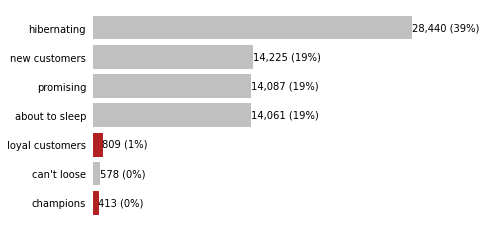

In [82]:
# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

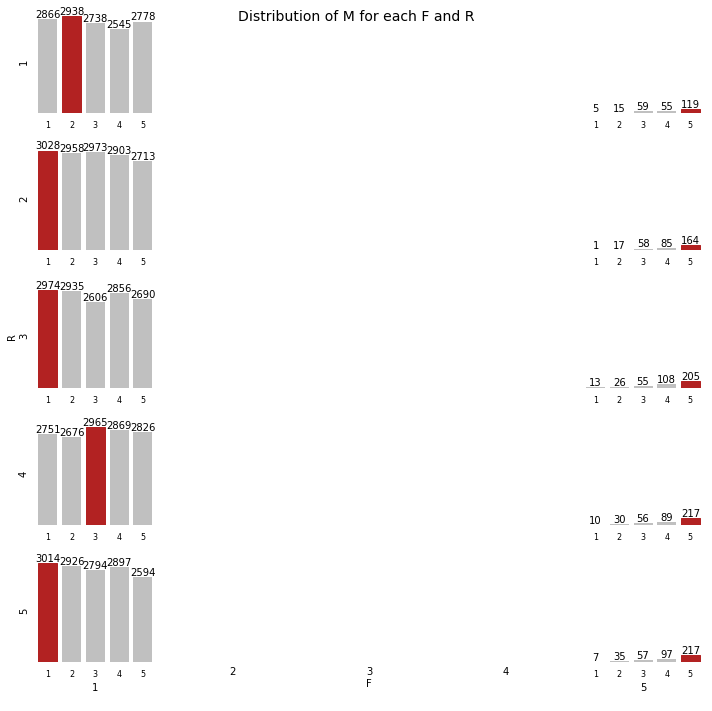

In [177]:
# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = rfm[(rfm['R'] == r) & (rfm['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

Большая часть (почти 40%) покупателей относится к сегменту Hibernating, также в этом сегменте сосредоточены крупные суммы покупок (monetary).
Для того, чтобы данные покупатели вернулись к покупкам, предлагаю сделать по данной группе рассылку с предложением скидки   
либо просокода на покупки в течние ближайшего месяца.